In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:
import pandas as pd

file_path = '/content/drive/My Drive/Sentiment_Analysis_Project/IMDB Dataset.csv'
df = pd.read_csv(file_path)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
#-------Preprocessing
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 109.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:

import re
import spacy
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    # 1. Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)

    # 2. Lowercase
    text = text.lower()

    # 3. Remove punctuation and numbers (keep letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # 4. Tokenize using simple split
    tokens = text.split()

    # 5. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 6. Join back to a cleaned string
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Check cleaned text samples
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


In [11]:
!pip install textblob

import nltk
nltk.download('punkt')
nltk.download('wordnet')

import textblob.download_corpora
textblob.download_corpora.download_all()

from textblob import TextBlob

def fast_lemmatize(text):
    words = TextBlob(text).words
    return ' '.join([word.lemmatize() for word in words])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [12]:
df['clean_review'] = df['cleaned_review'].apply(fast_lemmatize)


In [14]:
df['clean_review'].head()

,clean_review
0,one reviewer mentioned watching oz episode you...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically there family little boy jake think t...
4,petter matteis love time money visually stunni...


In [ ]:
df[['clean_review']].to_csv('/content/drive/My Drive/Sentiment_Analysis_Project/clean_review.csv', index=False)

#------------Now cleaned_data is saved into the drive and we don't need to run above cells again.

In [1]:
from google.colab import drive
import pandas as pd

# Mount Drive
drive.mount('/content/drive')

# Load original dataset (with Sentiment labels)
original_path = '/content/drive/My Drive/Sentiment_Analysis_Project/IMDB Dataset.csv'
df_original = pd.read_csv(original_path)

# Load your cleaned reviews
cleaned_path = '/content/drive/My Drive/Sentiment_Analysis_Project/clean_review.csv'
df_clean = pd.read_csv(cleaned_path)

# Combine cleaned reviews and sentiment labels
df_clean['sentiment'] = df_original['sentiment']

# Check combined data
df_clean.head()


Mounted at /content/drive


,clean_review,sentiment
0,one reviewer mentioned watching oz episode you...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# TF-IDF vectorization (max features should be around 5000-20,000 for 50k samples in dataset)
vectorizer = TfidfVectorizer(max_features=18000)
X = vectorizer.fit_transform(df_clean['clean_review'])

# Encode sentiment labels to 0/1
le = LabelEncoder()
y = le.fit_transform(df_clean['sentiment'])  # positive -> 1, negative -> 0

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("TF-IDF shape:", X.shape)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


TF-IDF shape: (50000, 18000)
Training samples: 40000
Testing samples: 10000


In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize and train
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [36]:
#Saving model in my drive for later use
import joblib
joblib.dump(lr_model, '/content/drive/My Drive/Sentiment_Analysis_Project/logistic_model.pkl')


['/content/drive/My Drive/Sentiment_Analysis_Project/logistic_model.pkl']

In [41]:
#Saving vectorizer and label encoder in drive for later use
joblib.dump(vectorizer, '/content/drive/My Drive/Sentiment_Analysis_Project/tfidf_vectorizer.pkl')
joblib.dump(le, '/content/drive/My Drive/Sentiment_Analysis_Project/label_encoder.pkl')


['/content/drive/My Drive/Sentiment_Analysis_Project/label_encoder.pkl']

In [20]:
y_pred = lr_model.predict(X_test)


Accuracy: 89.61 %

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



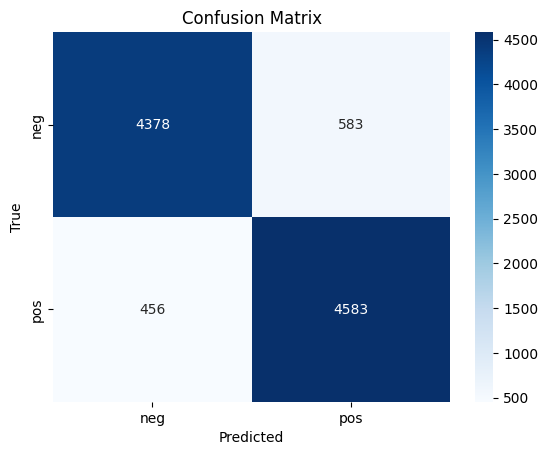

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred)*100,"%")

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Initialize model
lr_model = LogisticRegression(max_iter=1000)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')

# Output results
print("Cross-validation scores:", cv_scores)
print("Average accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))
print("Standard deviation: {:.2f}%".format(np.std(cv_scores) * 100))


Cross-validation scores: [0.8996 0.8945 0.8892 0.8925 0.8912]
Average accuracy: 89.34%
Standard deviation: 0.35%


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize Naive Bayes classifier
nb_model = MultinomialNB()

# Train on training data
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")


Naive Bayes Accuracy: 86.30%


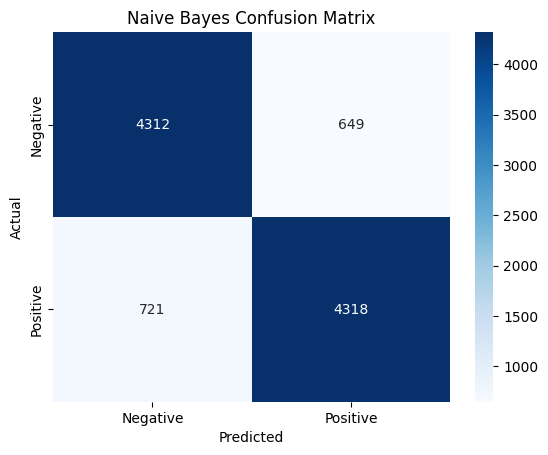

              precision    recall  f1-score   support

    Negative       0.86      0.87      0.86      4961
    Positive       0.87      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Naive Bayes 5-fold CV scores: [0.8627 0.8669 0.8633 0.8559 0.8625]
Average CV accuracy: 86.23%
Standard deviation: 0.36%


In [28]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Optional: classification report
print(classification_report(y_test, y_pred_nb, target_names=['Negative', 'Positive']))

# 2. Cross-validation scores (5-fold)
nb_cv_model = MultinomialNB()
cv_scores_nb = cross_val_score(nb_cv_model, X, y, cv=5, scoring='accuracy')

print("Naive Bayes 5-fold CV scores:", cv_scores_nb)
print("Average CV accuracy: {:.2f}%".format(np.mean(cv_scores_nb) * 100))
print("Standard deviation: {:.2f}%".format(np.std(cv_scores_nb) * 100))


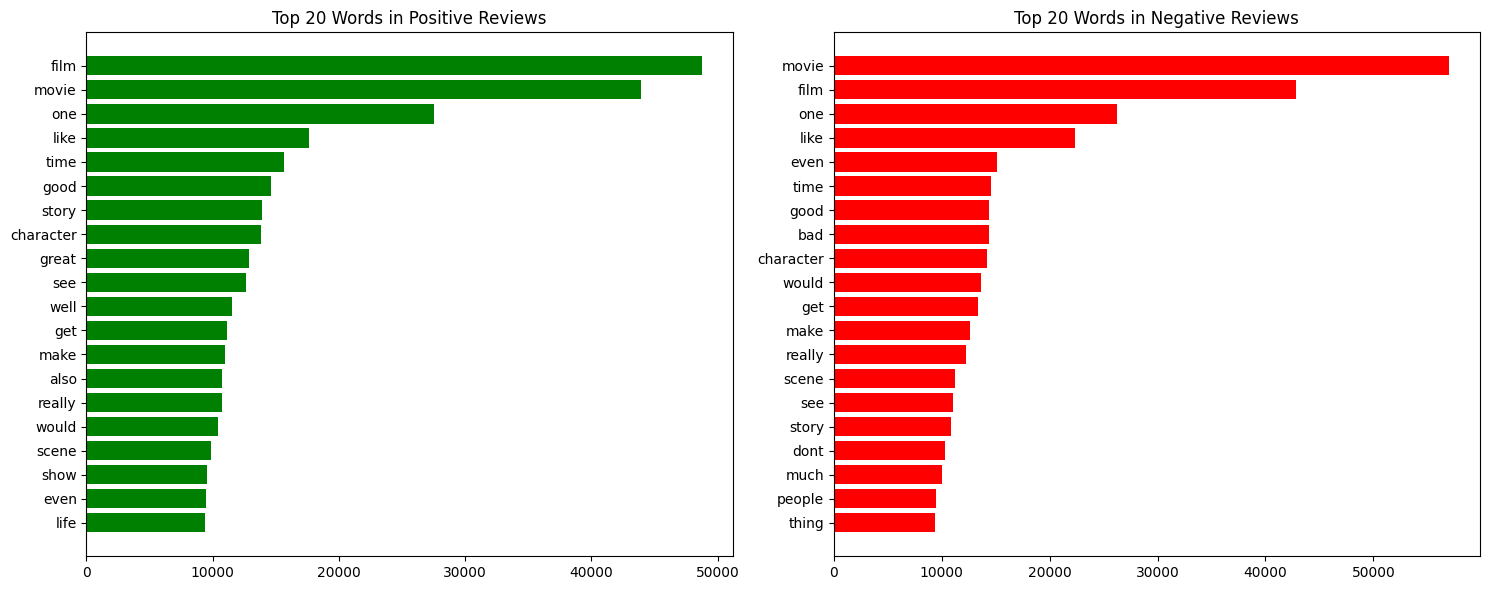

In [27]:
import matplotlib.pyplot as plt
from collections import Counter

# Separate positive and negative reviews
pos_reviews = df_clean[df_clean['sentiment'] == 'positive']['clean_review']
neg_reviews = df_clean[df_clean['sentiment'] == 'negative']['clean_review']

# Function to get top N frequent words
def get_top_words(text_series, n=20):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Get top 20 words for positive and negative reviews
top_pos = get_top_words(pos_reviews)
top_neg = get_top_words(neg_reviews)

# Unpack words and counts
pos_words, pos_counts = zip(*top_pos)
neg_words, neg_counts = zip(*top_neg)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15,6))

# Positive words bar plot
axs[0].barh(pos_words[::-1], pos_counts[::-1], color='green')
axs[0].set_title('Top 20 Words in Positive Reviews')

# Negative words bar plot
axs[1].barh(neg_words[::-1], neg_counts[::-1], color='red')
axs[1].set_title('Top 20 Words in Negative Reviews')

plt.tight_layout()
plt.show()


In [ ]:
#-------------------------------Start running cells from here for testing this model-----------------------------------------#
import joblib

# Load model
lr_model = joblib.load('/content/drive/My Drive/Sentiment_Analysis_Project/logistic_model.pkl')

# Load vectorizer
vectorizer = joblib.load('/content/drive/My Drive/Sentiment_Analysis_Project/tfidf_vectorizer.pkl')

# Load label encoder
le = joblib.load('/content/drive/My Drive/Sentiment_Analysis_Project/label_encoder.pkl')


In [37]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'<.*?>', ' ', text)  # Remove HTML tags
    text = text.lower()                 # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
def predict_sentiment(review_text):
    cleaned = preprocess_text(review_text)
    vector = vectorizer.transform([cleaned])     # Use fitted vectorizer
    pred = lr_model.predict(vector)               # Use trained model
    return le.inverse_transform(pred)[0]          # Decode label back to string


In [44]:
print(predict_sentiment("This movie was good"))
print(predict_sentiment("This movie was bad"))
print(predict_sentiment("You're a mean person"))
print(predict_sentiment("Absolutely loved the story and the acting was superb"))
print(predict_sentiment("The plot was boring and the characters were dull"))
print(predict_sentiment("An unforgettable experience, highly recommend!"))
print(predict_sentiment("I didn't like the ending, it was too predictable"))
print(predict_sentiment("What a fantastic performance by the lead actor"))
print(predict_sentiment("Terrible movie, wasted two hours of my life"))
print(predict_sentiment("A masterpiece with stunning visuals and great soundtrack"))


positive
negative
negative
positive
negative
positive
negative
positive
negative
positive
